In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Checking Missing values Using Heatmap

<AxesSubplot:>

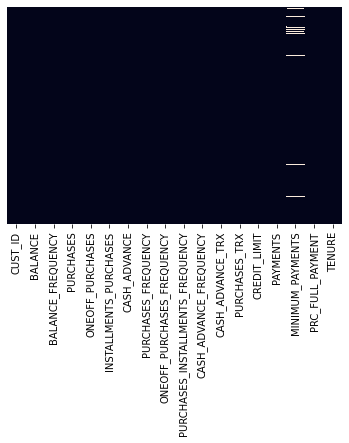

In [5]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False)

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [8]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [9]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Checking duplicates

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop("CUST_ID", axis = 1, inplace= True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# Univariate Analysis / Distributions

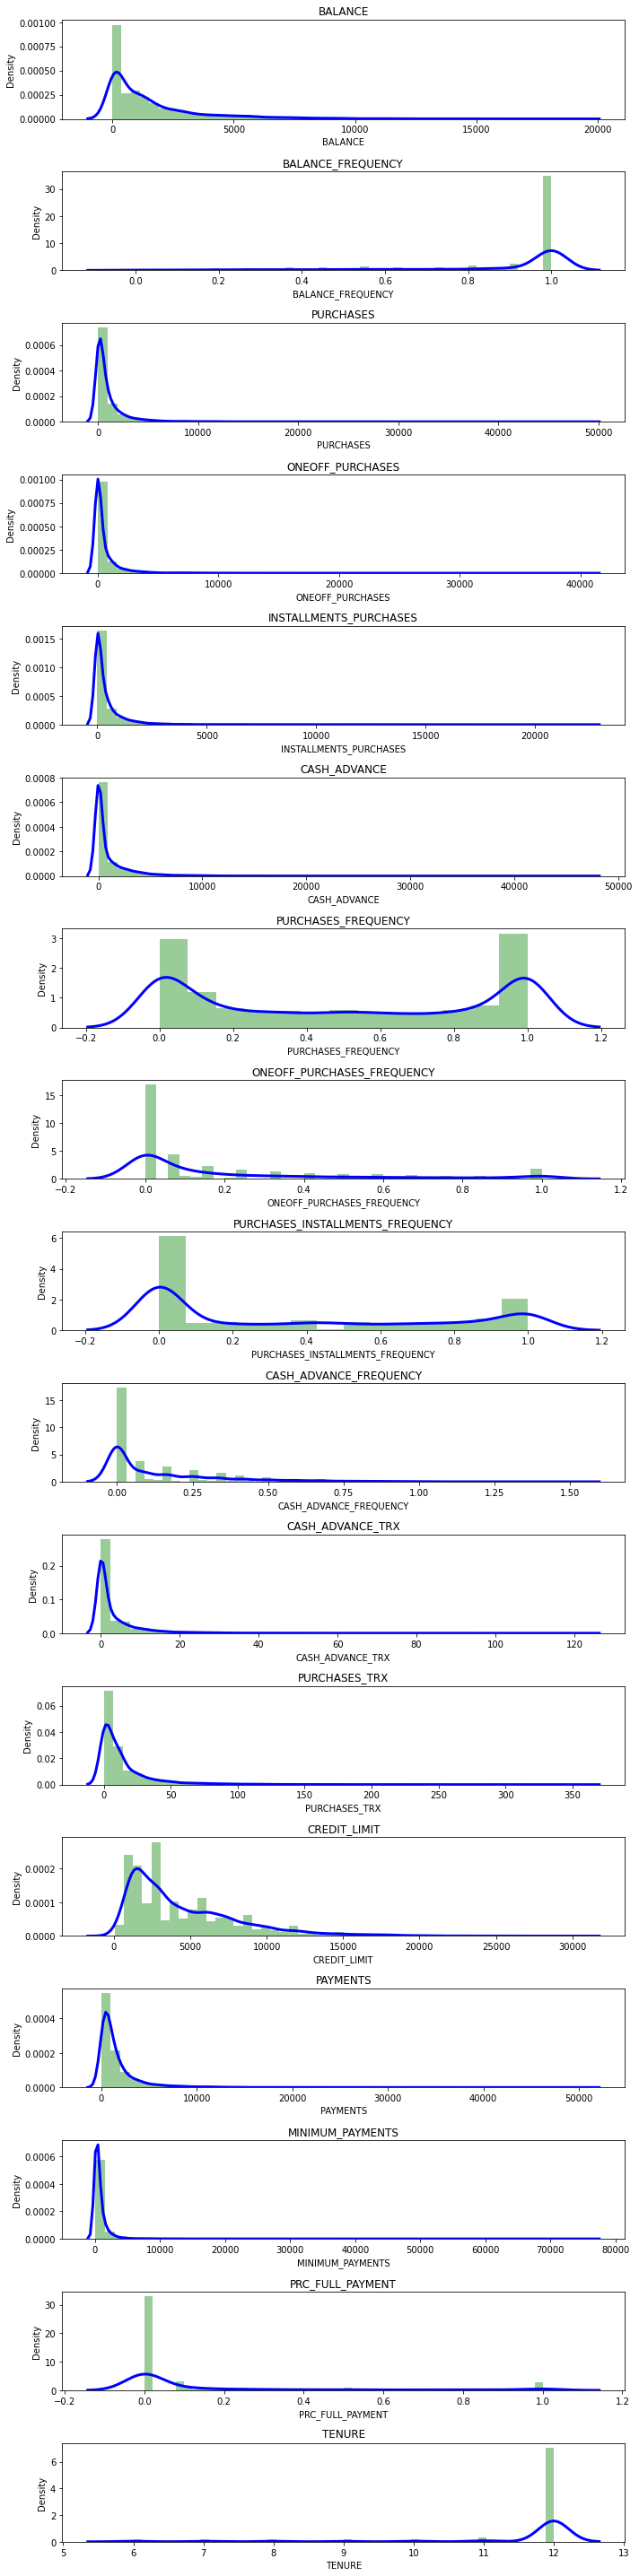

In [13]:
plt.figure(figsize=(10,40))
for i in range(len(data.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(data.columns[i])

plt.tight_layout()

# Checking for outliers

<AxesSubplot:>

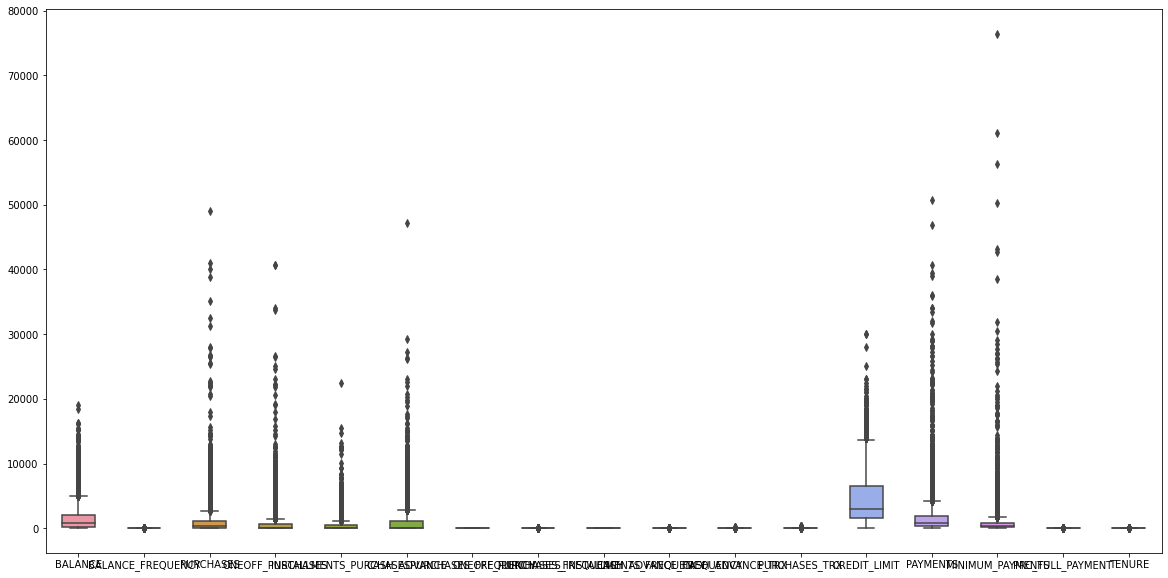

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = data,width=0.5,ax=ax,fliersize=5)

In [15]:
data.shape

(8950, 17)

# Using z-score to remove outliers

In [16]:
z = np.abs(stats.zscore(data))
data_new = data[(z < 3).all(axis=1)]

In [17]:
data_new.shape

(7434, 17)

In [18]:
data.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9],axis=0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0.1,23.575529,0.454545,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1200.0,179.617069,109.131328,0.000000,10.0
0.2,77.238026,0.818182,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1500.0,313.141031,157.390750,0.000000,12.0
0.3,207.176552,0.909091,89.285,0.000,0.000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,1.0,2000.0,459.438287,181.647737,0.000000,12.0
0.4,467.021989,1.000000,212.850,0.000,0.000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,4.0,2500.0,624.268198,227.692134,0.000000,12.0
0.5,873.385231,1.000000,361.280,38.000,89.000,0.000000,0.500000,0.083333,0.166667,0.000000,0.0,7.0,3000.0,856.901546,312.343947,0.000000,12.0
0.6,1207.815587,1.000000,557.546,168.378,213.950,238.633724,0.666667,0.083333,0.416667,0.083333,1.0,11.0,4200.0,1185.259270,438.826129,0.000000,12.0
0.7,1698.588855,1.000000,894.316,400.155,371.139,797.272297,0.857143,0.222222,0.666667,0.166667,3.0,13.0,6000.0,1604.092113,642.820796,0.083333,12.0
0.8,2571.434263,1.000000,1422.438,816.992,603.292,1574.933778,1.000000,0.416667,0.857143,0.250000,5.0,22.0,7000.0,2314.017654,994.385464,0.250000,12.0
0.9,4338.563657,1.000000,2542.624,1600.099,1140.070,3065.534560,1.000000,0.750000,1.000000,0.416667,10.0,37.0,9500.0,3923.906642,1731.689977,0.670000,12.0


# Standardize and normalise the data

In [19]:
# Standardize data
scaler = pp.StandardScaler() 
data_scaled = scaler.fit_transform(data_new) 
  
# Normalizing the Data 
normalized_data = pp.normalize(data_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_data) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,-0.027026,0.013920,-0.042302,-0.034893,-0.030990,-0.034476,-0.019265,-0.027610,-0.014834,-0.026875,-0.031729,-0.036176,-0.037203,-0.044959,-0.029301,-0.026544,0.025394
std,0.239254,0.271923,0.208457,0.207249,0.226597,0.221126,0.287098,0.250252,0.288824,0.252112,0.226601,0.223999,0.267969,0.221542,0.207028,0.252503,0.212490
min,-0.452296,-0.878609,-0.355266,-0.363863,-0.366396,-0.357833,-0.515054,-0.447738,-0.516494,-0.454412,-0.386338,-0.374279,-0.624530,-0.513763,-0.411532,-0.448247,-0.920672
25%,-0.205002,0.016372,-0.197351,-0.175837,-0.192035,-0.178300,-0.272108,-0.202863,-0.260200,-0.215459,-0.184052,-0.204106,-0.245774,-0.204156,-0.160509,-0.185662,0.060544
50%,-0.088676,0.119404,-0.108511,-0.113400,-0.110532,-0.120917,0.005897,-0.123378,-0.116894,-0.115244,-0.119822,-0.096630,-0.094605,-0.100231,-0.098256,-0.119249,0.087900
75%,0.094023,0.181929,0.078453,0.031477,0.069954,0.045293,0.240487,0.081786,0.235306,0.135988,0.063996,0.077334,0.144409,0.055655,0.037711,0.005338,0.115646
max,0.798808,0.436138,0.645499,0.754880,0.828054,0.873147,0.562275,0.796227,0.669512,0.786173,0.855786,0.834896,0.871908,0.911076,0.975499,0.835604,0.263275


# Finding the Optimal number of clusters using Elbow and Sillhouette method

Text(0, 0.5, 'Silhouette Score')

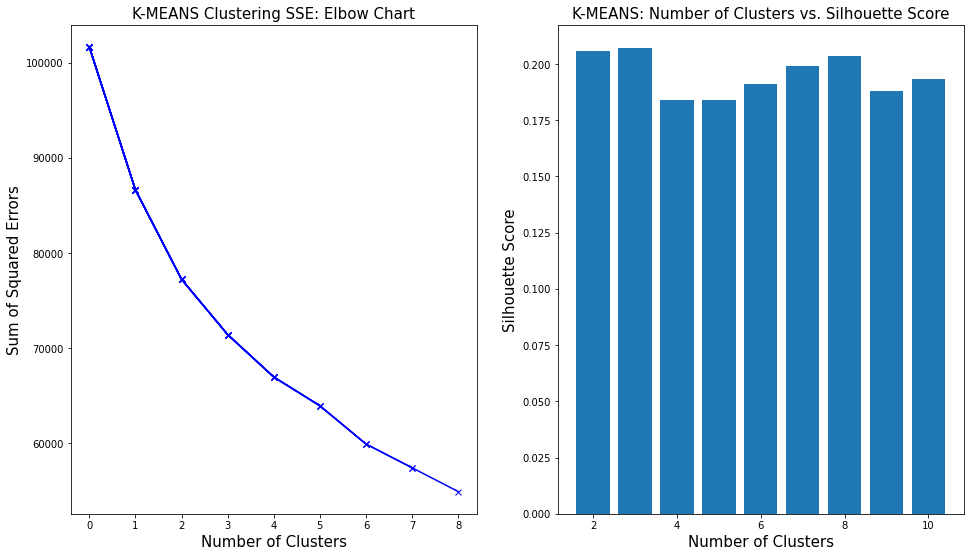

In [22]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=11
cost=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(data_scaled)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(data_scaled, KMeans(n_clusters = n_cluster).fit_predict(data_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

# Building the k-means model

In [23]:
kmeans = KMeans(3,random_state=0)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [31]:
labels

array([1, 2, 0, ..., 1, 1, 1])

# No of Observations in each cluster

In [32]:
pd.DataFrame(labels).value_counts()

1    4180
2    1793
0    1461
dtype: int64

# Cluster centres / Average value of each column in each cluster

In [36]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.085425,0.379049,1.561885,1.260732,1.187628,-0.303113,1.071305,1.209769,0.829064,-0.365628,-0.328700,1.456074,0.627566,0.718449,0.080674,0.352722,0.203315
1,-0.431002,-0.257014,-0.329779,-0.290557,-0.212285,-0.410498,-0.048897,-0.259781,-0.017692,-0.439421,-0.425010,-0.273565,-0.324675,-0.392742,-0.286378,0.063233,-0.033369
2,0.934421,0.290006,-0.503773,-0.349884,-0.472678,1.203076,-0.758550,-0.380072,-0.633963,1.321361,1.257718,-0.548549,0.245230,0.329775,0.601398,-0.434548,-0.087845


# Above values are scaled values hence in order to read them correctly we need to transform them in their original shape

In [37]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1399.494740,0.970529,2354.637940,1431.676934,923.026893,297.537094,0.910328,0.540273,0.682987,0.051628,1.019165,34.072553,5841.945119,2329.547073,640.100451,0.257143,11.913073
1,615.635067,0.834804,414.977095,200.716162,214.700440,164.889073,0.466367,0.117631,0.350549,0.039912,0.639627,7.921752,3046.447739,733.429999,355.165840,0.172958,11.724097
2,2688.143099,0.951528,236.568027,153.640195,82.947185,2158.058559,0.185115,0.083035,0.108600,0.319466,7.270903,3.764214,4719.521300,1771.254652,1044.328723,0.028201,11.680602


# Concatening the clusters to our original dataframe to know that which observation falls in which cluster

In [38]:
data_with_clusters = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
data_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0


# Visualising the clusters in histogram

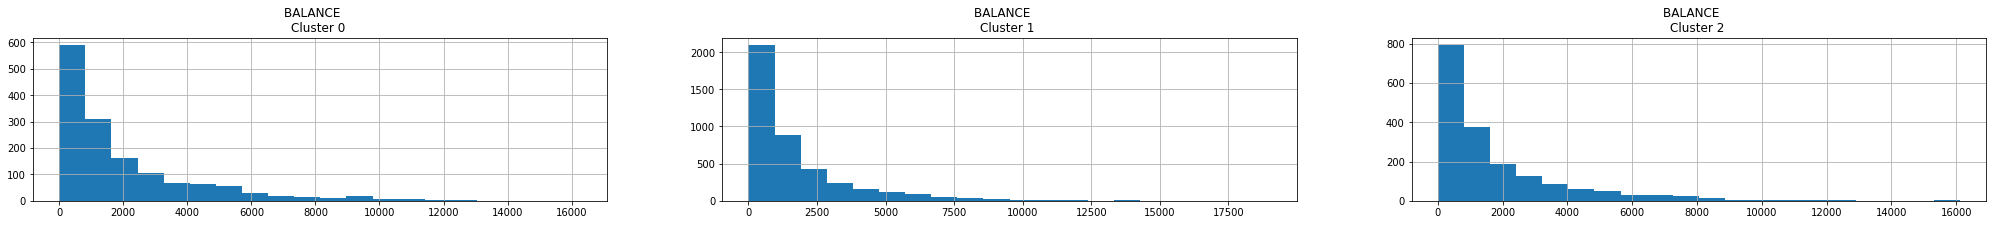

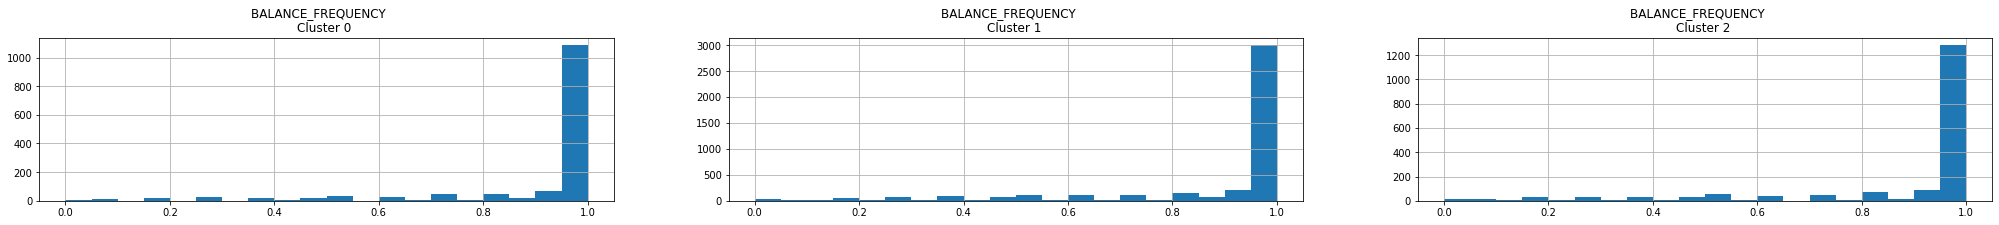

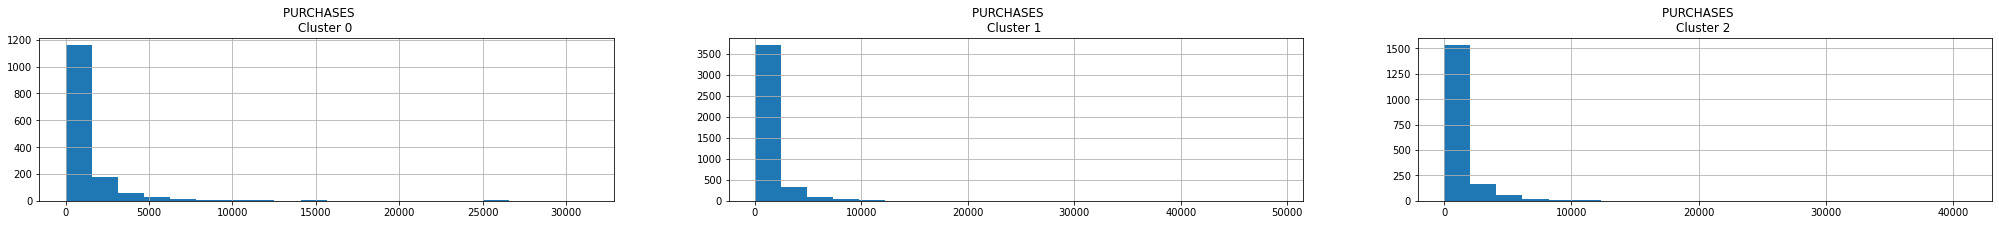

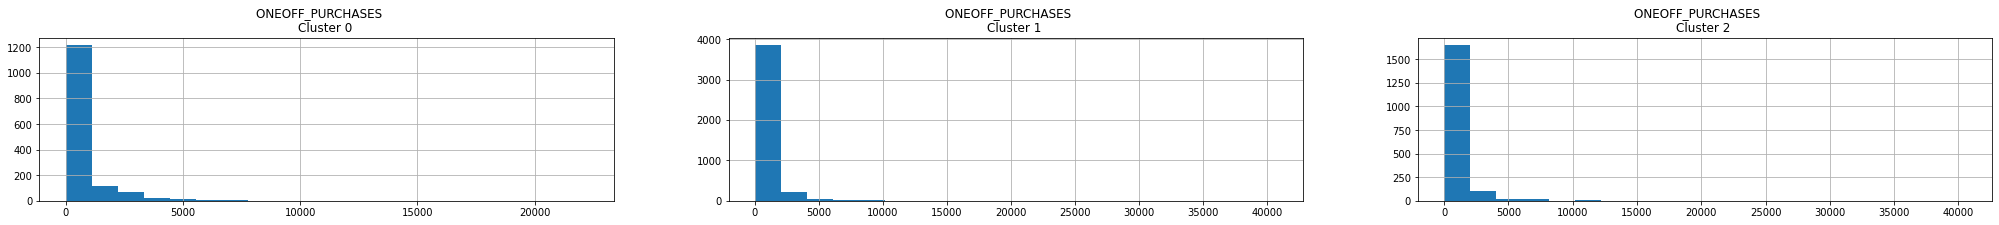

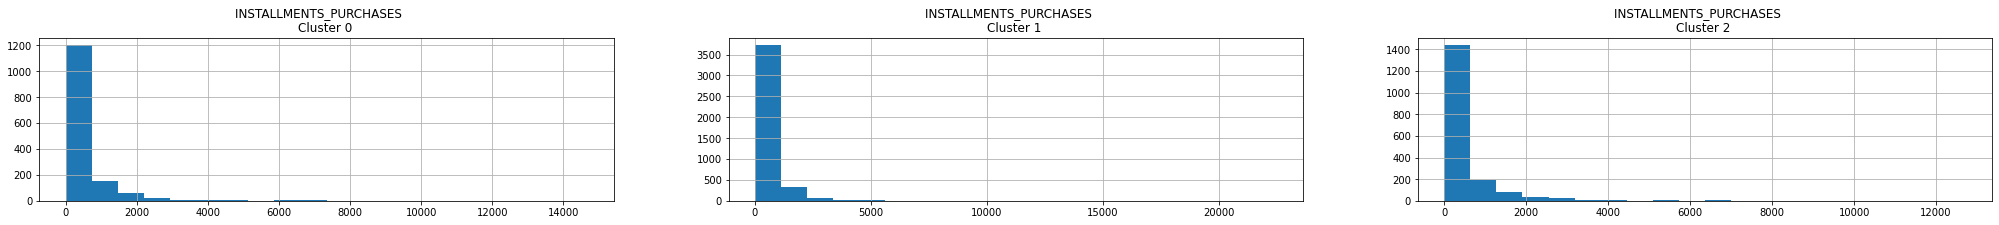

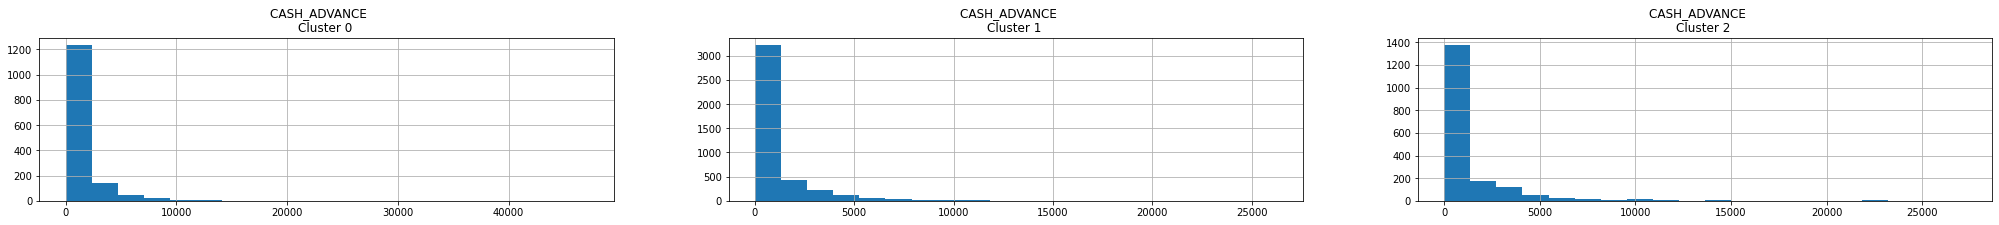

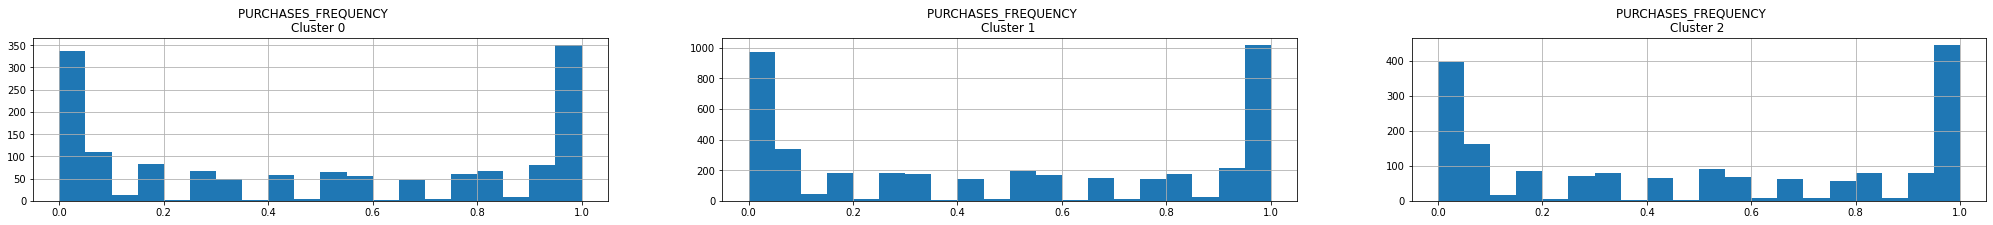

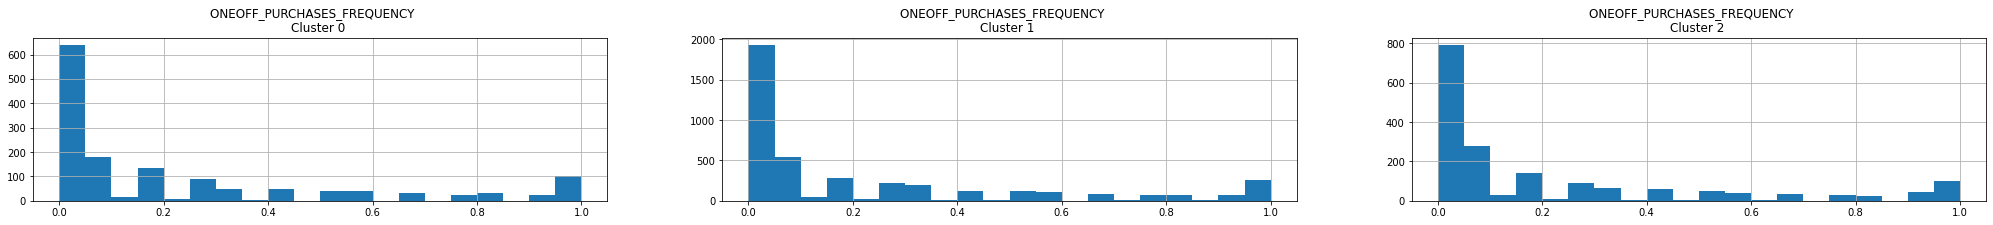

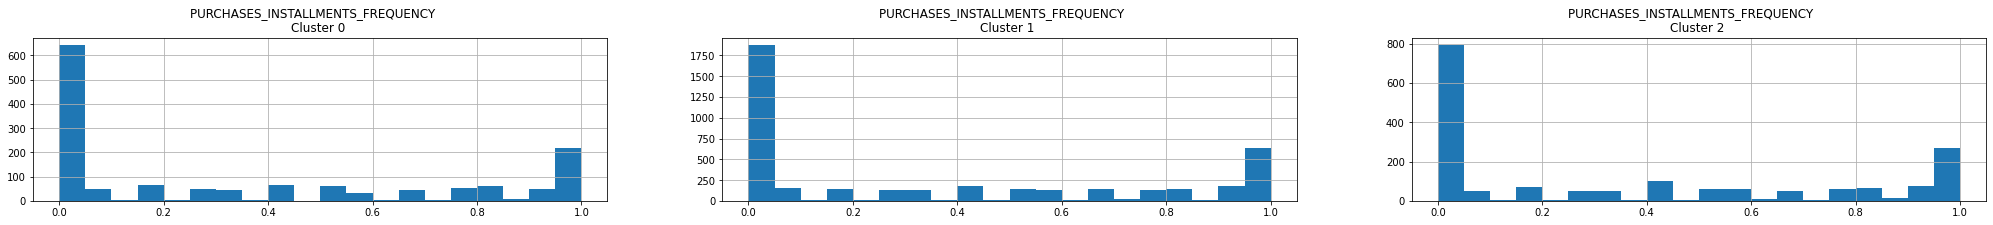

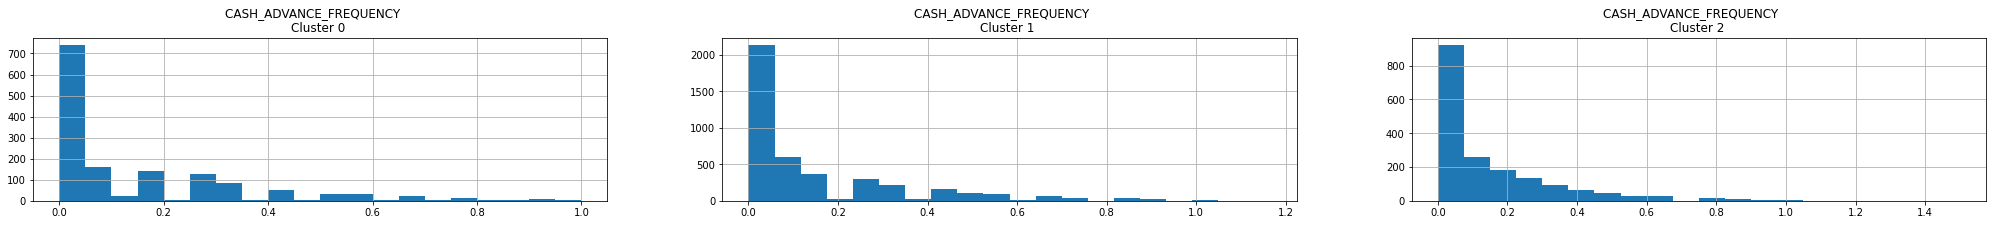

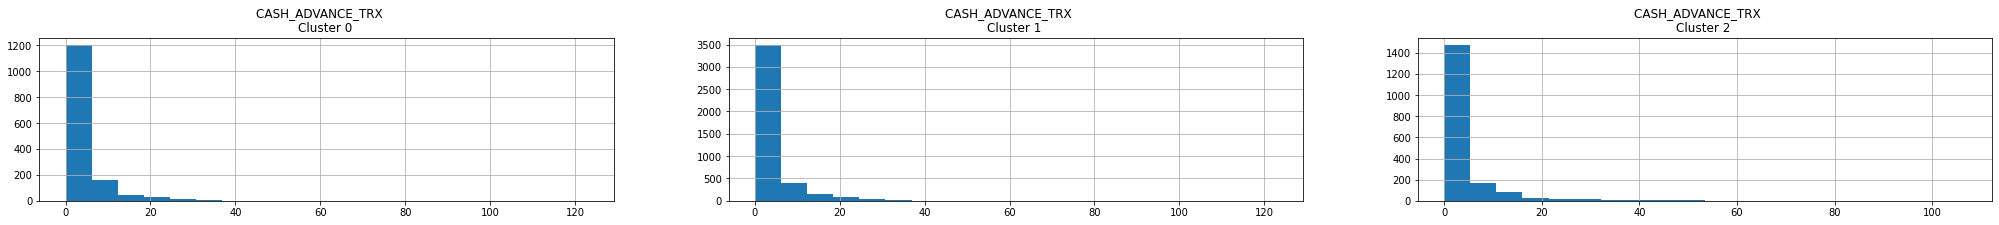

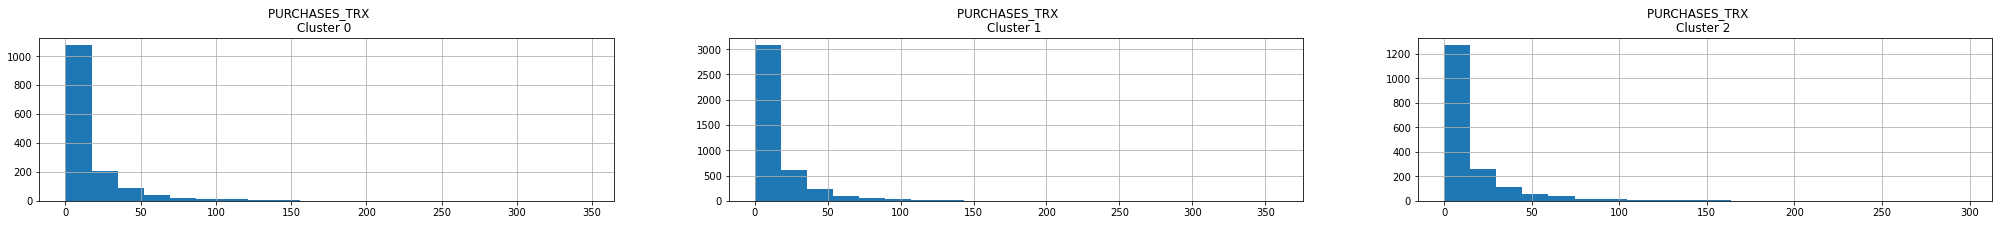

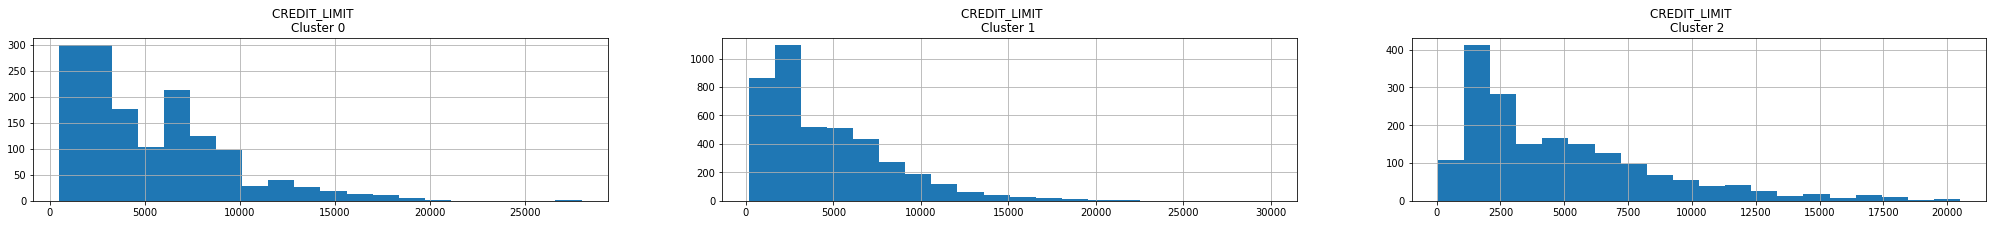

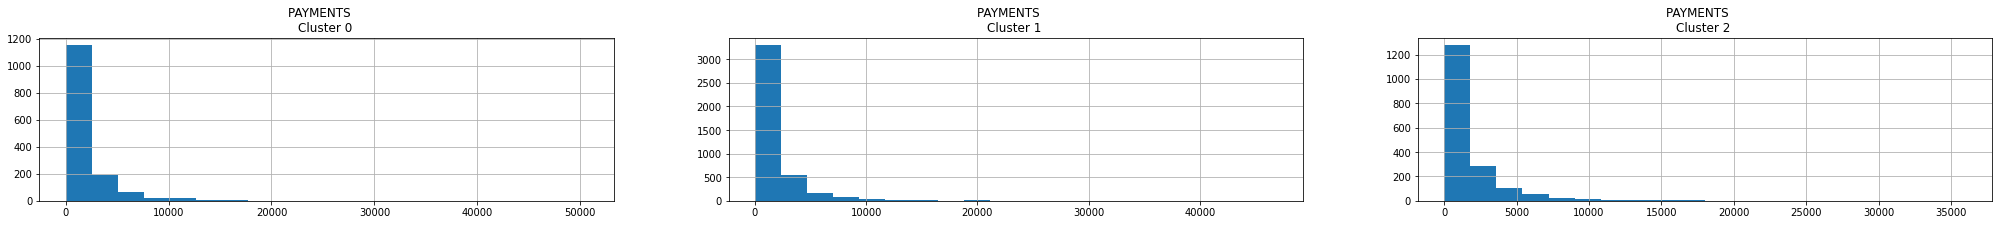

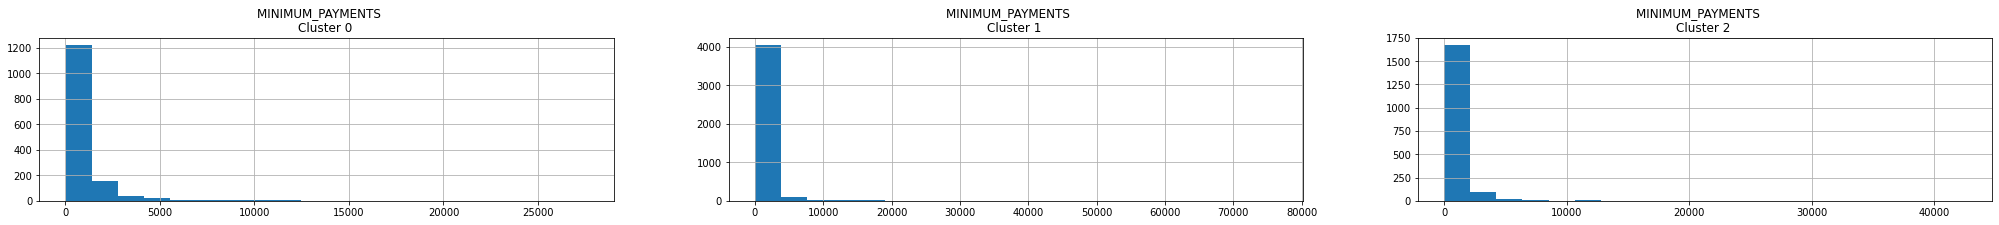

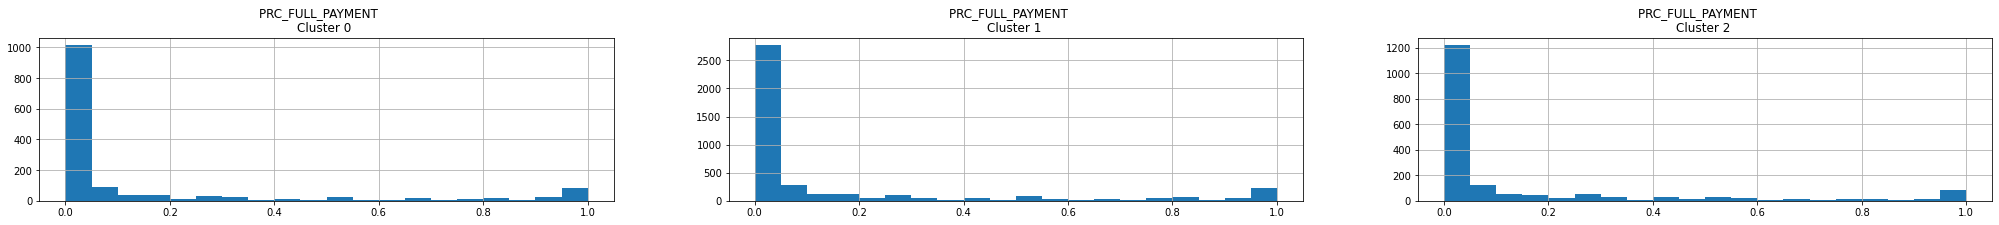

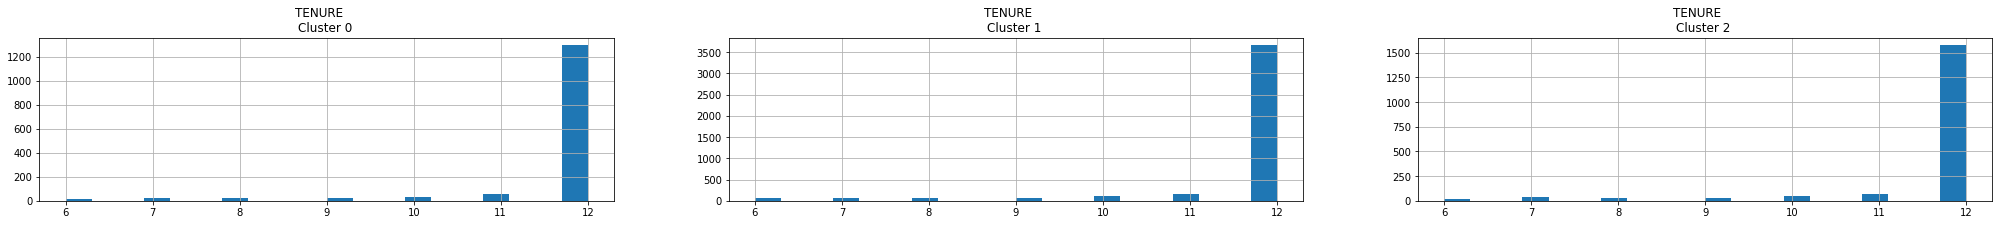

In [40]:
for i in data.columns:
  plt.figure(figsize = (35, 3))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = data_with_clusters[data_with_clusters['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()
